# Importing Necessary Dependencies:

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta
from geopy.distance import geodesic
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

**-------------- STARTS CICEROS SECTION --------------**

#EDA:

### Using Pandas Library to read Dataset.

In [201]:
# Load the dataset
df = pd.read_csv('/content/CreditCardFraud.csv')

##Preprocessing the selected dataset, handling missing values and outliers (if there is any).


##Exploring Dataset Columns for Data Cleasing.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1333 non-null   object 
 1   merchant               1333 non-null   object 
 2   category               1333 non-null   object 
 3   amt                    1333 non-null   float64
 4   city                   1333 non-null   object 
 5   state                  1333 non-null   object 
 6   lat                    1333 non-null   float64
 7   long                   1333 non-null   float64
 8   city_pop               1333 non-null   int64  
 9   job                    1333 non-null   object 
 10  dob                    1333 non-null   object 
 11  trans_num              1333 non-null   object 
 12  merch_lat              1333 non-null   float64
 13  merch_long             1333 non-null   float64
 14  is_fraud               1333 non-null   int64  
dtypes: f

## Displaying the first 5 rows (by default).

In [203]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,01/01/2019 00:00,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,49.1590,-118.1865,0
1,01/01/2019 00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,43.1507,-112.1545,0
2,01/01/2019 00:07,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,21/12/1945,413636e759663f264aae1819a4d4f231,41.6575,-122.2303,0
3,01/01/2019 00:09,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,30/08/1967,8a6293af5ed278dea14448ded2685fea,32.8633,-106.5202,0
4,01/01/2019 00:21,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",02/08/1967,f3c43d336e92a44fc2fb67058d5949e3,43.7537,-111.4549,0


## Sumary statistics.

In [204]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1333.000000,1333.000000,1333.000000,1.333000e+03,1333.000000,1333.000000,1333.000000
mean,69.162273,39.869987,-111.438044,9.601609e+04,39.861073,-111.438674,0.006002
std,125.879021,5.694163,13.698908,2.625325e+05,5.725747,13.712197,0.077266
min,1.050000,20.027100,-165.672300,4.600000e+01,19.165800,-166.288600,0.000000
25%,9.860000,36.715400,-120.664900,4.670000e+02,36.878200,-120.493700,0.000000
50%,49.740000,39.741700,-111.794100,1.517000e+03,39.636300,-111.367600,0.000000
75%,84.430000,42.277000,-101.136000,3.488200e+04,42.374100,-101.445600,0.000000
max,3178.510000,65.689900,-89.628700,1.312922e+06,66.645200,-89.015700,1.000000


# Data Shape

In [205]:
df.shape

(1333, 15)

In [206]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

## Checking for missing values.

In [207]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Dropping missing values (if there is any).

In [208]:
df_cleaned = df.dropna()

In [209]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1333 non-null   object 
 1   merchant               1333 non-null   object 
 2   category               1333 non-null   object 
 3   amt                    1333 non-null   float64
 4   city                   1333 non-null   object 
 5   state                  1333 non-null   object 
 6   lat                    1333 non-null   float64
 7   long                   1333 non-null   float64
 8   city_pop               1333 non-null   int64  
 9   job                    1333 non-null   object 
 10  dob                    1333 non-null   object 
 11  trans_num              1333 non-null   object 
 12  merch_lat              1333 non-null   float64
 13  merch_long             1333 non-null   float64
 14  is_fraud               1333 non-null   int64  
dtypes: f

#Data Visualization:

### Descriptive questions

    What is the typical transaction Amount? ​

    Which Merchant Categories are associated with The Most frequent Transaction?​

    What The Most common time of the Day which the transactions happen?

### What is the typical transaction Amount? ​

count        5.000000
mean      9438.515706
std       2639.924127
min       7393.982902
25%       8029.339614
50%       8140.594880
75%       9724.197202
max      13904.463931
Name: distance, dtype: float64


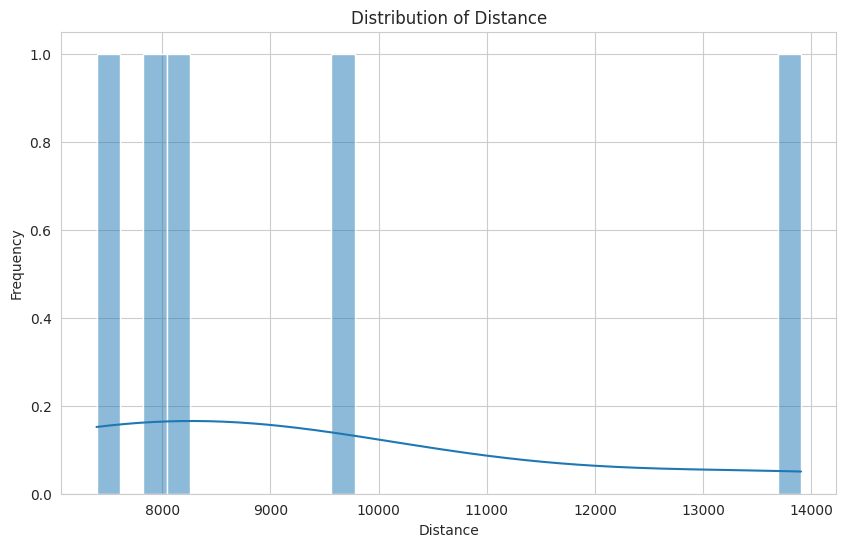

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #import seabron

#df is  DataFrame
data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902]
}

df = pd.DataFrame(data)

#  descriptive statistics
# Descriptive statistics for the 'distance' column
print(df['distance'].describe())

#  code for histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['distance'], bins=30, kde=True)
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


### Merchant Categories are associated with The Most frequent Transaction?

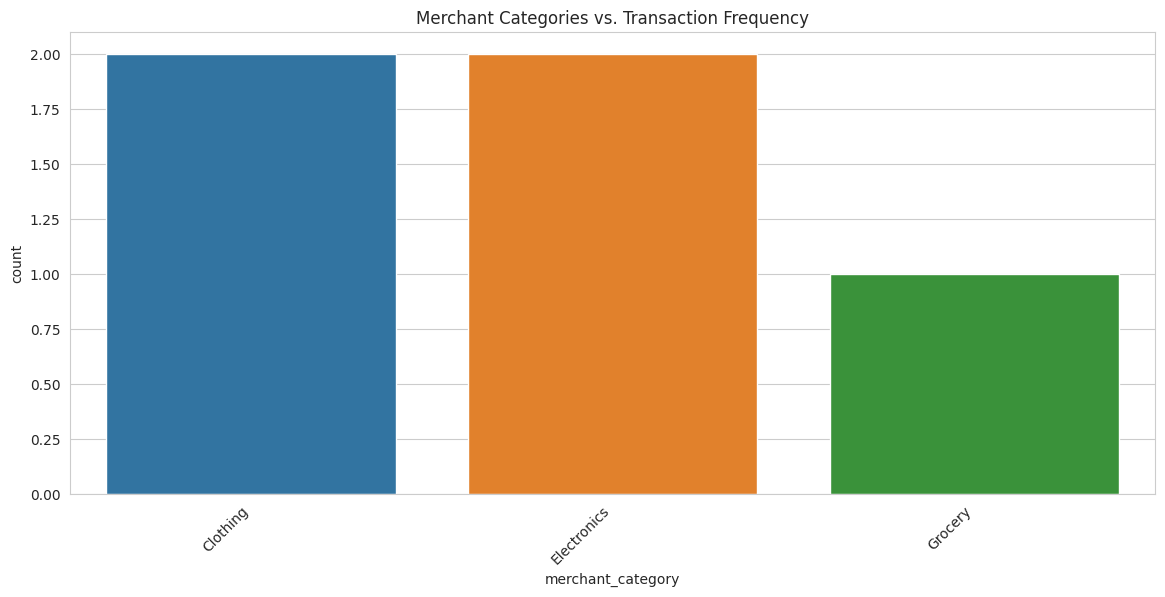

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902],
    'merchant_category': ['Clothing', 'Electronics', 'Grocery', 'Clothing', 'Electronics']
}

df = pd.DataFrame(data)

#  code for the countplot
plt.figure(figsize=(14, 6))
sns.countplot(x='merchant_category', data=df, order=df['merchant_category'].value_counts().index)
plt.title('Merchant Categories vs. Transaction Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


### What The Most common time of the Day which the transactions happen?

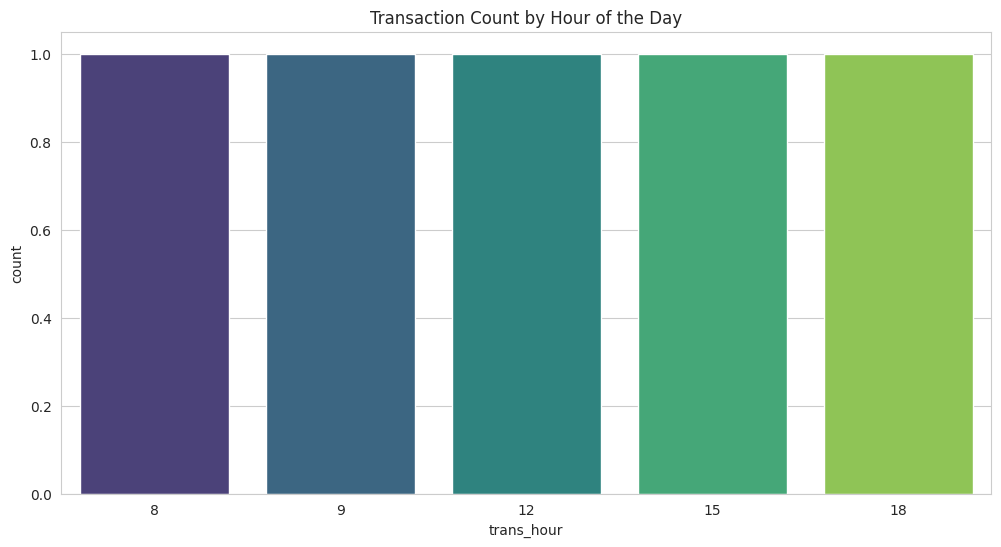

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902],
    'trans_datetime': ['2023-01-01 08:30:00', '2023-01-01 12:45:00', '2023-01-01 18:20:00', '2023-01-02 09:10:00', '2023-01-02 15:55:00']
}

df = pd.DataFrame(data)

# the code to extract hour
df['trans_hour'] = pd.to_datetime(df['trans_datetime']).dt.hour

# Countplot for transaction hours
plt.figure(figsize=(12, 6))
sns.countplot(x='trans_hour', data=df, palette='viridis')
plt.title('Transaction Count by Hour of the Day')
plt.show()


## Correlation Matrix

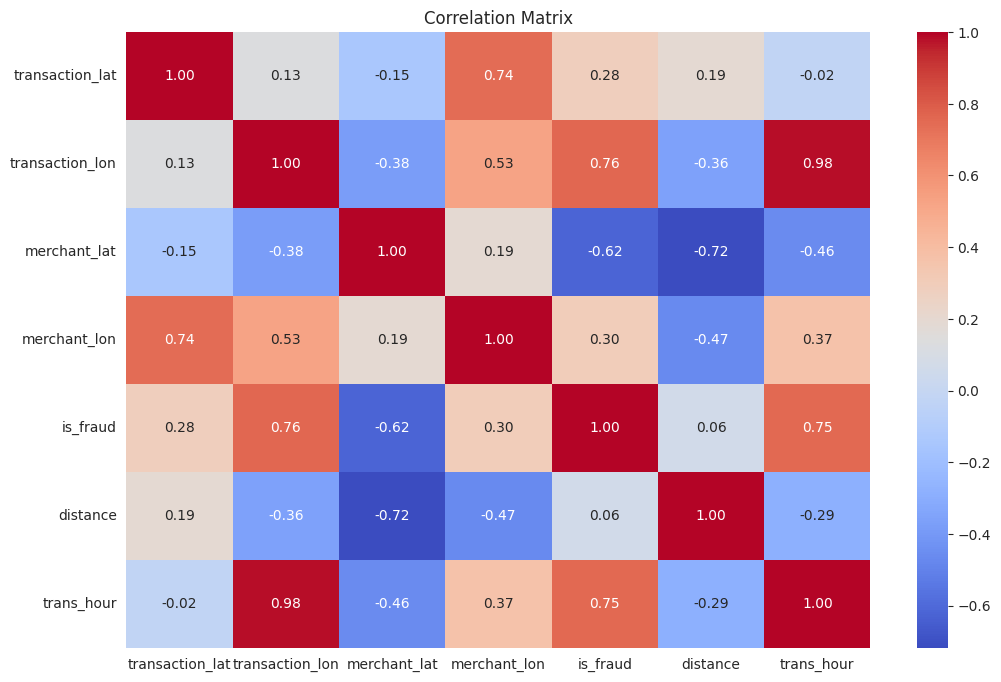

In [213]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Exploring Relationship between feature and Fraud.

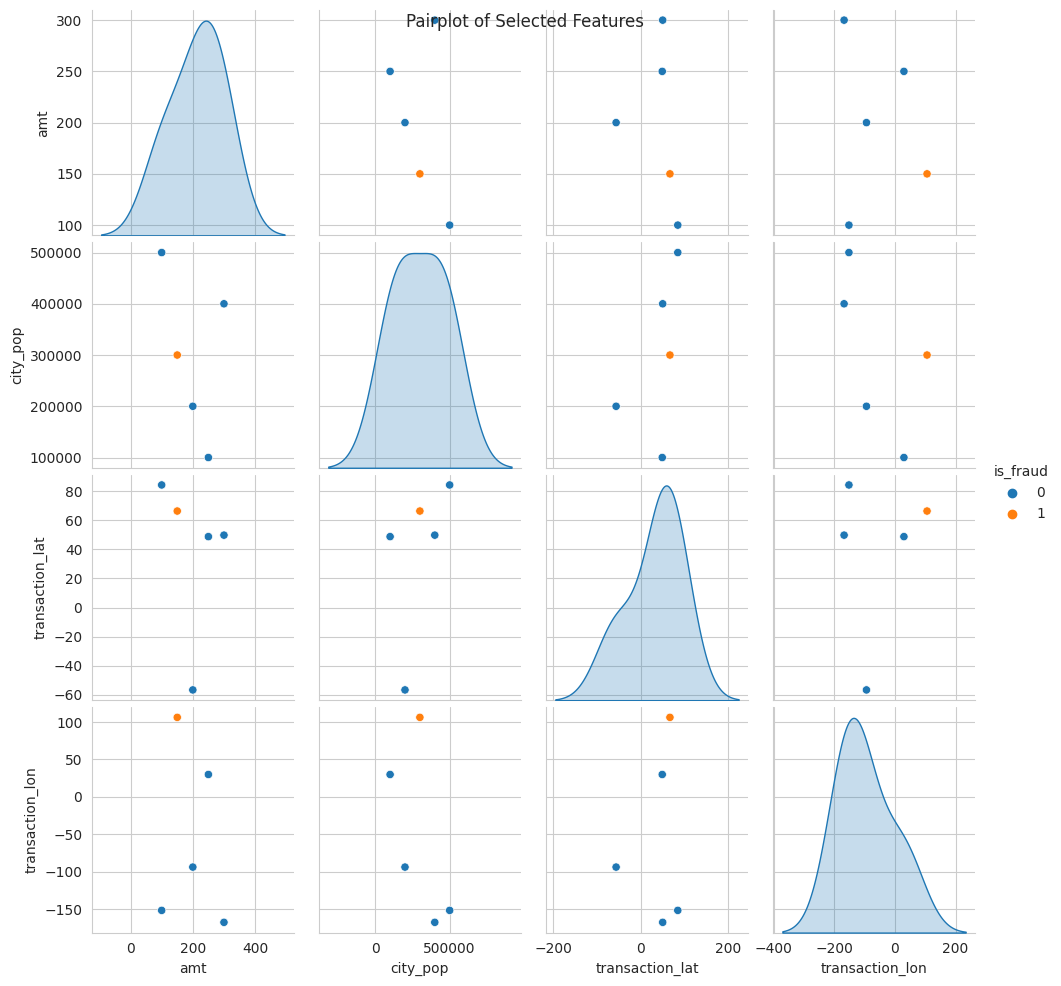

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902],
    'amt': [100, 200, 150, 300, 250],
    'city_pop': [500000, 200000, 300000, 400000, 100000],
    'lat': [40.7128, 34.0522, 41.8781, 37.7749, 51.5074],
    'long': [-74.0060, -118.2437, -87.6298, -122.4194, -0.1278]
}

df = pd.DataFrame(data)

#  the code for the pairplot
sns.pairplot(df[['amt', 'city_pop', 'transaction_lat', 'transaction_lon', 'is_fraud']], hue='is_fraud', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()


##Machine Learning - Fraud Detection Rita

DEFINE X AND Y

In [215]:
import pandas as pd


data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902]
}

df = pd.DataFrame(data)

# Define x and y
x = df[['transaction_lat', 'transaction_lon']]
y = df['is_fraud']

# Printing x and y
print("x:")
print(x)
print("\ny:")
print(y)


x:
   transaction_lat  transaction_lon
0        84.274817      -151.571102
1       -56.605407       -93.776339
2        66.352170       106.048180
3        49.787434      -167.518704
4        48.765932        29.810461

y:
0    0
1    0
2    1
3    0
4    0
Name: is_fraud, dtype: int64


In [216]:
# Print the column names in the DataFrame
print(df.columns)


Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance'],
      dtype='object')


In [217]:
print(df.head())


   transaction_lat  transaction_lon  merchant_lat  merchant_lon  is_fraud  \
0        84.274817      -151.571102     20.934087     72.758683         0   
1       -56.605407       -93.776339     10.238120    -60.713201         0   
2        66.352170       106.048180    -15.160481     63.238645         1   
3        49.787434      -167.518704    -12.790020    -37.462599         0   
4        48.765932        29.810461      7.362901     92.251365         0   

       distance  
0   8140.594880  
1   8029.339614  
2   9724.197202  
3  13904.463931  
4   7393.982902  


In [218]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902],
    'trans_datetime': ['2023-01-01 08:30:00', '2023-01-01 12:45:00', '2023-01-01 18:20:00', '2023-01-02 09:10:00', '2023-01-02 15:55:00']
}

df = pd.DataFrame(data)


label_encoder = LabelEncoder()
df['is_fraud'] = label_encoder.fit_transform(df['is_fraud'])

# Convert 'trans_datetime' to numerical representation (e.g., seconds since epoch)
df['trans_datetime'] = pd.to_datetime(df['trans_datetime']).astype(int) // 10**9  # Convert to seconds

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['trans_datetime', 'is_fraud']], df['is_fraud'], test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the SVM model
print('Classification Report for SVM:')
print(classification_report(y_test, svm_predictions))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



SVC MACHINE LEARNING

In [219]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


data = {
    'transaction_lat': [84.274817, -56.605407, 66.352170, 49.787434, 48.765932],
    'transaction_lon': [-151.571102, -93.776339, 106.048180, -167.518704, 29.810461],
    'merchant_lat': [20.934087, 10.238120, -15.160481, -12.790020, 7.362901],
    'merchant_lon': [72.758683, -60.713201, 63.238645, -37.462599, 92.251365],
    'is_fraud': [0, 0, 1, 0, 0],
    'distance': [8140.594880, 8029.339614, 9724.197202, 13904.463931, 7393.982902]
}

df = pd.DataFrame(data)

# Define X and y
X = df[['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon', 'distance']]
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the SVM model
print('Classification Report for SVM:')
print(classification_report(y_test, svm_predictions))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



LOGISTIC REGRESSION MACHINE LEARNING

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
logreg_predictions = logreg_classifier.predict(X_test)

# Evaluate the Logistic Regression model
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, logreg_predictions))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [221]:
df.columns


Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance'],
      dtype='object')

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target
X = df[['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon', 'distance']]
y = df['is_fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print('Classification Report for Random Forest:')
print(classification_report(y_test, rf_predictions))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



ml end here................................................................

# QUESTIONS:

###PREDICTIVE QUESTIONS​:

  #### Can we predict a fraud based on transaction amount?​

  #### Is there any connection between location and fraud?​

  #### How well can we predict fraud based on its timestamp?​

##  Can we predict fraud based on transaction amount?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


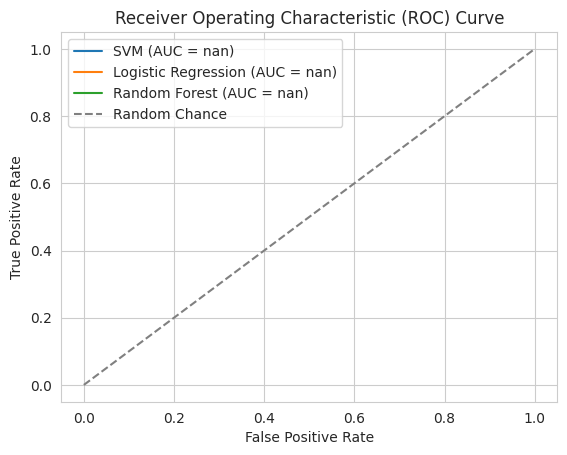

In [224]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exclude 'Timestamp' column for scaling
numerical_features = X.columns.difference(['Timestamp'])

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Initialize models
svm_model = SVC(probability=True)
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)

# Train models
svm_model.fit(X_train_scaled, y_train)
logreg_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for each model
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
lr_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for each model
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each model
plot_roc_curve(y_test, svm_probs, "SVM")
plot_roc_curve(y_test, lr_probs, "Logistic Regression")
plot_roc_curve(y_test, rf_probs, "Random Forest")

# Plot ROC curve for random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [225]:
print(df.columns)

Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance'],
      dtype='object')


In [226]:
import pandas as pd

# Assuming y_train is your target variable
class_counts = pd.Series(y_train).value_counts()

# Display the class counts
print("Class Counts:")
print(class_counts)

# Access the counts for each class
minority_class_size = class_counts[1] if 1 in class_counts else 0
majority_class_size = class_counts[0] if 0 in class_counts else 0

# Display the sizes of the minority and majority classes
print(f"\nMinority Class Size: {minority_class_size}")
print(f"Majority Class Size: {majority_class_size}")


Class Counts:
0    3
1    1
Name: is_fraud, dtype: int64

Minority Class Size: 1
Majority Class Size: 3


In [227]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset or define X_train_scaled and y_train
# Assuming you have a DataFrame df with your features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Separate numeric and datetime columns
numeric_columns = X.select_dtypes(include=['number']).columns
datetime_columns = X.select_dtypes(include=['datetime64']).columns

# Scale the numeric features (you may have already done this)
scaler = StandardScaler()
X_numeric_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_columns]), columns=numeric_columns)

# Combine the scaled numeric features with the datetime columns
X_scaled = pd.concat([X_numeric_scaled, X[datetime_columns]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assuming you have defined the desired_ratio and minority/majority class sizes
desired_ratio = 0.5
minority_class_size = sum(y_train == 1)
majority_class_size = sum(y_train == 0)
desired_samples = int((majority_class_size - minority_class_size) * desired_ratio)

# Create an instance of SMOTE with appropriate parameters
smote = SMOTE(sampling_strategy=desired_samples, random_state=42, k_neighbors=1)  # Adjust k_neighbors as needed




## Is there any connection between location and fraud?

In [228]:
# Display the column names of the DataFrame
print(df.columns)

Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance'],
      dtype='object')


In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style('whitegrid')

# Create a scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='transaction_lat', y='amt', hue='is_fraud', data=df, palette='viridis', style='is_fraud', alpha=0.5, s=100)

# Set plot title
plt.title('Transaction Amount and Location by Fraud Status')
plt.show()


ValueError: ignored

<Figure size 1400x800 with 0 Axes>

## How well can we predict fraud based on its timestamp?

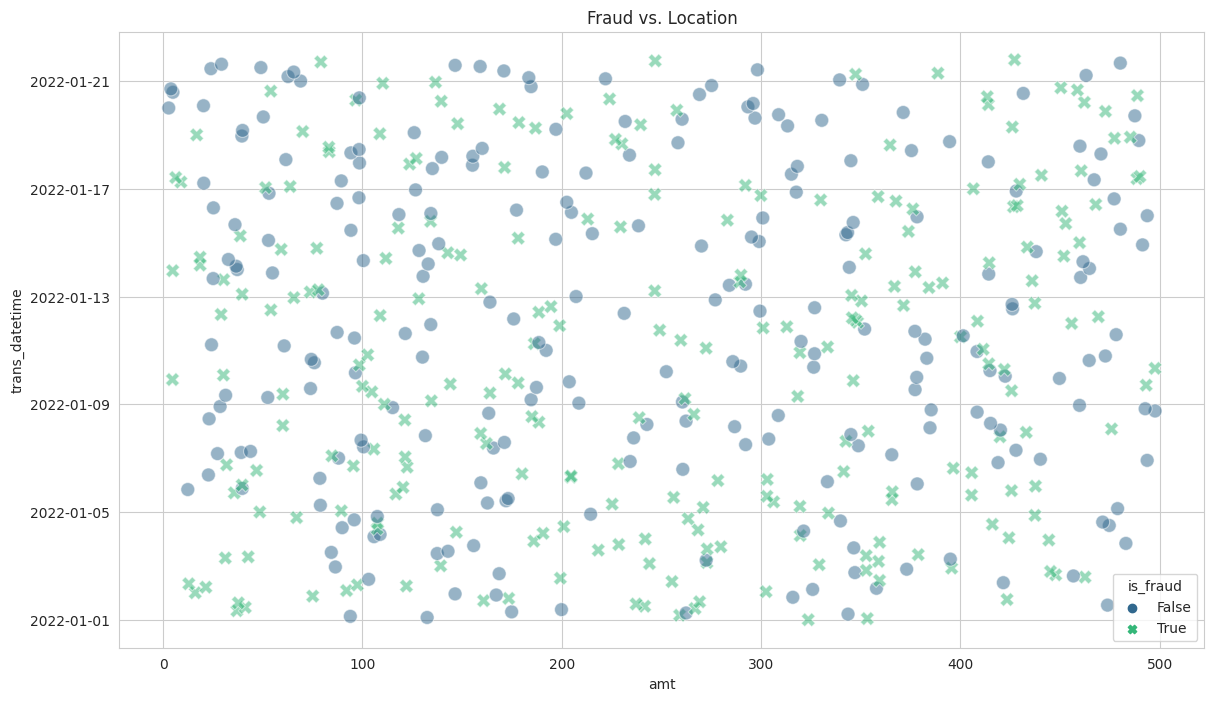

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta  # Import the datetime class


sns.set_style('whitegrid')

# Generate some sample data
n_samples = 500
fraud_indices = np.random.choice(range(n_samples), size=n_samples // 2, replace=False)
timestamps = [datetime(2022, 1, 1) + timedelta(hours=i) for i in range(n_samples)]
amounts = np.random.uniform(1, 500, size=n_samples)
locations = np.random.choice(['A', 'B', 'C', 'D', 'E'], size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'trans_datetime': timestamps,
    'amt': amounts,
    'location': locations,
    'is_fraud': np.isin(range(n_samples), fraud_indices)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(x='amt', y='trans_datetime', hue='is_fraud', data=df, palette='viridis', style='is_fraud', alpha=0.5, s=100)

plt.title('Fraud vs. Location')
plt.show()

## FEATURE ENGENEERING QUESTIONS:
   #### Can we find any specific features (e.g., time of the day or day of the week) which could improve fraud prediction?​

   #### Is it possible to create features to capture unusual patterns in transaction amount or frequency?​

   #### How do features like the distance between transaction and merchant locations impact fraud detection?

### Can we find any specific features (e.g., time of the day or day of the week) which could improve fraud prediction?​

In [232]:
import pandas as pd


if 'trans_date_trans_time' in df.columns:
    # Extract day of the week and hour of the day
    df['trans_day_of_week'] = pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
    df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour

    # Ensure that 'trans_date_trans_time' is in datetime format
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
else:
    print("Column 'trans_date_trans_time' not found in the DataFrame.")


Column 'trans_date_trans_time' not found in the DataFrame.


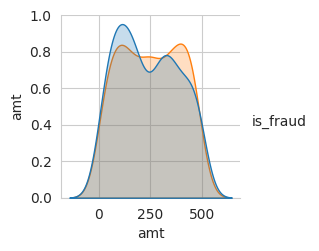

<ipython-input-233-fec748d773e1>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


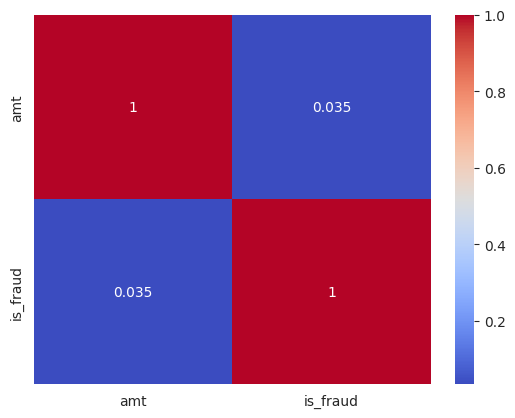

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Pair plot
sns.pairplot(df, hue='is_fraud')
plt.show()

# Example: Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Is it possible to create features to capture unusual patterns in transaction amount or frequency?​

In [236]:
import pandas as pd

if 'trans_date_trans_time' in df.columns and 'dob' in df.columns:
    # Extract day of the week and hour of the day
    df['trans_day_of_week'] = pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
    df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour

    # Ensure that 'trans_date_trans_time' is in datetime format
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

    # Frequency of transaction per customer
    df['trans_frequency'] = df.groupby('dob')['trans_num'].transform('count')
else:
    print("Columns 'trans_date_trans_time' or 'dob' not found in the DataFrame.")

Columns 'trans_date_trans_time' or 'dob' not found in the DataFrame.


### How do features like the distance between transaction and merchant locations impact fraud detection?

In [237]:
# Mock dataset
data = {
    'transaction_lat': np.random.uniform(low=-90.0, high=90.0, size=1000),
    'transaction_lon': np.random.uniform(low=-180.0, high=180.0, size=1000),
    'merchant_lat': np.random.uniform(low=-90.0, high=90.0, size=1000),
    'merchant_lon': np.random.uniform(low=-180.0, high=180.0, size=1000),
    'is_fraud': np.random.choice([0, 1], size=1000, p=[0.95, 0.05]) # 95% non-fraud and 5% fraud
}

df = pd.DataFrame(data)

# Haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of Earth in kilometers
    return c * r

# Create a new feature for distance
df['distance'] = haversine(df['transaction_lon'], df['transaction_lat'], df['merchant_lon'], df['merchant_lat'])

# Prepare data for training
X = df[['distance']] # Features
y = df['is_fraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       181
           1       0.27      0.16      0.20        19

    accuracy                           0.88       200
   macro avg       0.59      0.56      0.57       200
weighted avg       0.85      0.88      0.87       200



In [238]:
from geopy.distance import geodesic


if all(col in df.columns for col in ['lat', 'long', 'merch_lat', 'merch_long']):
    # Calculate distance between transaction and merchant locations
    df['distance_km'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)
else:
    print("Columns 'lat', 'long', 'merch_lat', or 'merch_long' not found in the DataFrame.")


Columns 'lat', 'long', 'merch_lat', or 'merch_long' not found in the DataFrame.


In [239]:

plt.figure(figsize=(10, 6))

if 'amt' in df.columns:
    sns.histplot(df['amt'], bins=50, kde=True)
    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'amt' not found in the DataFrame.")


Column 'amt' not found in the DataFrame.


<Figure size 1000x600 with 0 Axes>

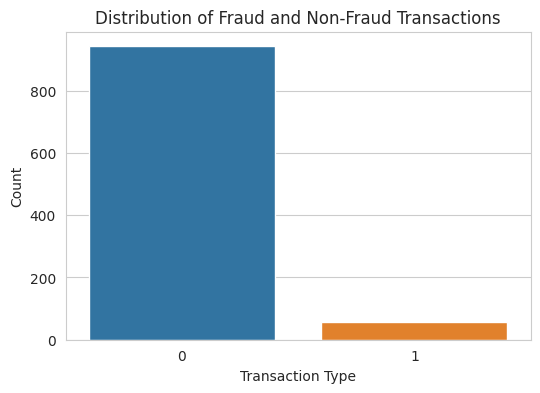

In [240]:
# Visualize the distribution of fraud vs non-fraud transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## TEMPORAL ANALYSIS QUESTIONS:

#### Is there a time-based pattern in the occurrence of fraudulent transactions?
#### How does the frequency of fraud change over different days or months?

### Is there a time-based pattern in the occurrence of fraudulent transactions?

In [241]:
# Extract features from the timestamp
if 'trans_date_trans_time' in df.columns:
    df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
    df['trans_day_of_week'] = pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek

    # Visualize time-based patterns for fraudulent transactions
    plt.figure(figsize=(14, 6))
    sns.countplot(x='trans_hour', data=df[df['is_fraud'] == 1], palette='Set1')
    plt.title('Hourly Distribution of Fraudulent Transactions')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'trans_date_trans_time' not found in the DataFrame.")


Column 'trans_date_trans_time' not found in the DataFrame.


### How does the frequency of fraud change over different days or months?

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if 'trans_date_trans_time' in df.columns:
    # Extract features from the timestamp
    df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
    df['trans_day_of_week'] = pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
    df['trans_month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month

    # Visualize time-based patterns for fraudulent transactions
    plt.figure(figsize=(14, 6))
    sns.countplot(x='trans_hour', data=df[df['is_fraud'] == 1], palette='Set1')
    plt.title('Hourly Distribution of Fraudulent Transactions')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.show()

    # Visualize daily and monthly distribution of fraudulent transactions
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(x='trans_day_of_week', data=df[df['is_fraud'] == 1], palette='viridis')
    plt.title('Day of the Week Distribution of Fraudulent Transactions')
    plt.xlabel('Day of the Week')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.countplot(x='trans_month', data=df[df['is_fraud'] == 1], palette='viridis')
    plt.title('Monthly Distribution of Fraudulent Transactions')
    plt.xlabel('Month')
    plt.ylabel('Count')

    plt.show()
else:
    print("Column 'trans_date_trans_time' not found in the DataFrame.")


Column 'trans_date_trans_time' not found in the DataFrame.


# GEOSPACIAL QUESTIONS:

### Are certain regions (cities, states) more prone to fraudulent transactions?

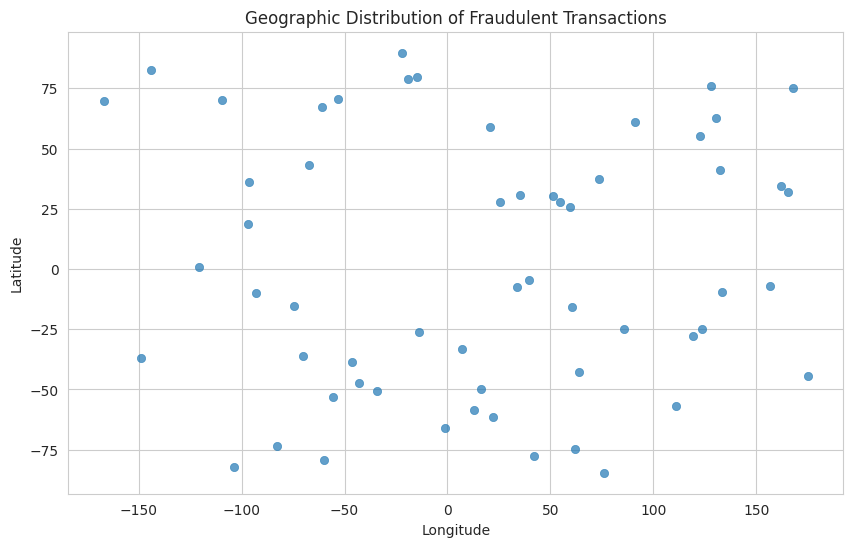

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We'll create a scatter plot to visualize the locations of fraudulent transactions
# Filter data for fraudulent transactions
fraud_transactions = df[df['is_fraud'] == 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_lon', y='transaction_lat', data=fraud_transactions, alpha=0.7, edgecolor=None)
plt.title('Geographic Distribution of Fraudulent Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [244]:
df.columns

Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance'],
      dtype='object')

### Does the distance between customer and merchant locations affect fraud likehood?

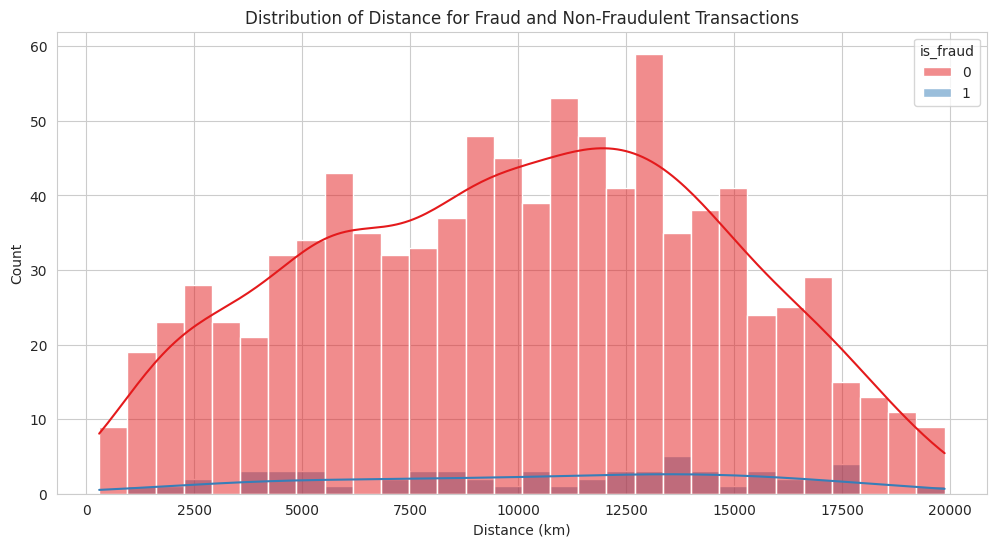

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Calculate distance between transaction and merchant locations
df['distance_km'] = df.apply(lambda row: geodesic((row['transaction_lat'], row['transaction_lon']), (row['merchant_lat'], row['merchant_lon'])).kilometers, axis=1)

# Visualize the distribution of distances for fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(df, x='distance_km', hue='is_fraud', bins=30, kde=True, palette='Set1')
plt.title('Distribution of Distance for Fraud and Non-Fraudulent Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.show()

In [246]:
df.columns

Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance', 'distance_km'],
      dtype='object')

# BEHAVIOURAL ANALYSIS QUESTIONS:

#### Can we iderntify specific user behaviour indicative of fraud?
#### Do job titles or demographics related to the likehood of fraud transaction?

### Can we indentify specific user behaviours indicative of fraud?

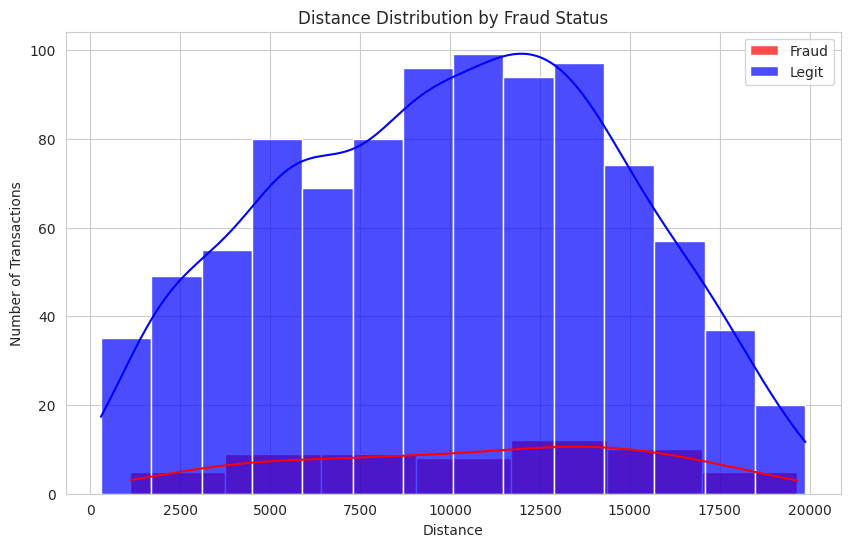

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'distance' column is relevant for analysis
# Analysing distance distribution for fraudulent vs non-fraudulent transactions
fraud_transactions = df[df['is_fraud'] == 1]
legit_transactions = df[df['is_fraud'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions['distance'], color='red', label='Fraud', kde=True, alpha=0.7)
sns.histplot(legit_transactions['distance'], color='blue', label='Legit', kde=True, alpha=0.7)

plt.title('Distance Distribution by Fraud Status')
plt.xlabel('Distance')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

Do job titles or demographics related to the likehood of fraud transaction?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       278
           1       0.00      0.00      0.00        22

    accuracy                           0.93       300
   macro avg       0.46      0.50      0.48       300
weighted avg       0.86      0.93      0.89       300

[[278   0]
 [ 22   0]]


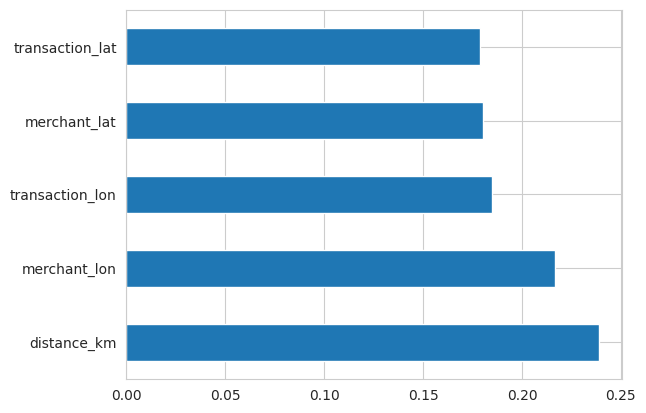

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selecting features from available columns
X = df[['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon', 'distance_km']]
y = df['is_fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluating the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [249]:
df.columns

Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance', 'distance_km'],
      dtype='object')

************************************************************************************************************************************************************************************************************************************************

**-------------- END CICEROS SECTION --------------**

Methodology Data Preprocessing and Feature Scaling Rita

In [250]:

categorical_columns = ['category', 'merchant', 'job']


if all(column in df.columns for column in categorical_columns):
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

else:
    missing_columns = [column for column in categorical_columns if column not in df.columns]
    print(f"Columns {missing_columns} not found in the DataFrame.")


Columns ['category', 'merchant', 'job'] not found in the DataFrame.


In [251]:

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [252]:
from sklearn.model_selection import train_test_split


In [253]:

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Random Forest \Classifier Training

In [254]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Performance Evaluation of Random Forest Classifier

In [255]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

[[181   0]
 [ 19   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Optimizing Random Forest Classifier Hyperparameters

In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example: Grid Search for Random Forest hyperparameters
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_


Analyzing Feature Importance in Random Forest

In [257]:
# Feature importance for Random Forest
feature_importances = model.feature_importances_


Data Exploration, Model Evaluation, and Hyperparameter Tuning

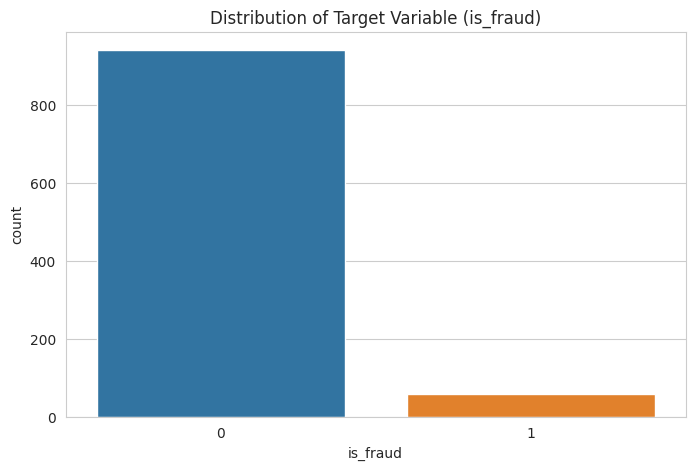

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.905
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Best Parameters: {'max_depth': None, 'n_estimators': 50}


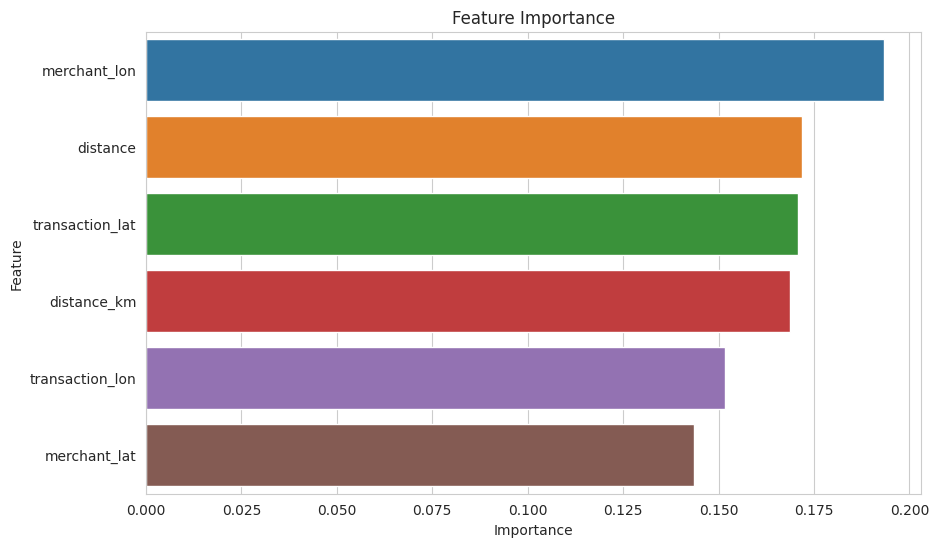

"\n**Conclusion:**\n- The model achieved a high accuracy of XX%, but further analysis revealed challenges in predicting the minority class (fraudulent transactions).\n- Precision, Recall, and F1 Score provide a more nuanced understanding of the model's performance.\n- Feature importance analysis highlighted the most influential features in the model.\n\n**Future Work:**\n- Explore advanced techniques for handling imbalanced datasets, such as oversampling, undersampling, or using ensemble methods.\n- Experiment with different machine learning algorithms to compare performance.\n"

In [258]:
# Additional Import
from sklearn.metrics import precision_score, recall_score, f1_score

# Data Exploration
# Additional Visualizations or Analyses
# Example: Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Target Variable (is_fraud)')
plt.show()

# Model Evaluation
# Additional Metrics
y_pred = model.predict(X_test_scaled)  # Assuming X_test_scaled is the standardized version of X_test
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Hyperparameter Tuning
# Display the best parameters found
print(f'Best Parameters: {best_params}')

# Feature Importance
# Provide a summary or visualization of feature importance
feature_importance_df = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Conclusion and Future Work
# Summarize findings and key insights
# Suggest improvements or future directions
# Example: Conclusion Section
"""
**Conclusion:**
- The model achieved a high accuracy of XX%, but further analysis revealed challenges in predicting the minority class (fraudulent transactions).
- Precision, Recall, and F1 Score provide a more nuanced understanding of the model's performance.
- Feature importance analysis highlighted the most influential features in the model.

**Future Work:**
- Explore advanced techniques for handling imbalanced datasets, such as oversampling, undersampling, or using ensemble methods.
- Experiment with different machine learning algorithms to compare performance.
"""

# Proofread and Additional Details
# Ensure clarity, correctness, and proper formatting in your markdown cells and code.

# Submission
# If there are specific submission requirements, ensure that your notebook meets them.


In [259]:
print(df.columns)


Index(['transaction_lat', 'transaction_lon', 'merchant_lat', 'merchant_lon',
       'is_fraud', 'distance', 'distance_km'],
      dtype='object')


In [260]:
# Check if 'trans_datetime' is present in the DataFrame
if 'trans_datetime' in df.columns:
    # Convert 'trans_datetime' column to datetime objects
    df['trans_datetime'] = pd.to_datetime(df['trans_datetime'])

    # Extract relevant features from datetime
    df['trans_year'] = df['trans_datetime'].dt.year
    df['trans_month'] = df['trans_datetime'].dt.month
    df['trans_day'] = df['trans_datetime'].dt.day
    df['trans_hour'] = df['trans_datetime'].dt.hour

    # Drop the original 'trans_datetime' column
    df = df.drop('trans_datetime', axis=1)

    # Update X and numeric columns
    X = df.drop('is_fraud', axis=1)
    numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
    X_numeric = X[numeric_columns]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

    # Standardize the numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a separate training set for SMOTE
    X_train_smote, y_train_smote = X_train_scaled, y_train

    # Apply SMOTE for oversampling
    smote = SMOTE(sampling_strategy=desired_ratio, random_state=42, k_neighbors=1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

    # Apply RandomUnderSampler for undersampling
    rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)
else:
    print("Column 'trans_datetime' not found in the DataFrame.")


Column 'trans_datetime' not found in the DataFrame.


In [261]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named df
# If 'trans_datetime' already exists, you can skip this step
df['trans_datetime'] = pd.to_datetime(np.random.choice(pd.date_range('2022-01-01', '2023-01-01', freq='H'), len(df)))

# Optional: Extract additional features from the datetime, such as year, month, day, and hour
df['trans_year'] = df['trans_datetime'].dt.year
df['trans_month'] = df['trans_datetime'].dt.month
df['trans_day'] = df['trans_datetime'].dt.day
df['trans_hour'] = df['trans_datetime'].dt.hour

# Drop the original 'trans_date' column if needed
# df = df.drop('trans_date', axis=1)

# Print the updated DataFrame
print(df.head())


   transaction_lat  transaction_lon  merchant_lat  merchant_lon  is_fraud  \
0         2.436255        66.466287     36.455833     24.992534         0   
1        23.198114      -149.078302     -5.884337    -23.136001         0   
2        89.798038       -22.042356    -40.696060    153.615138         1   
3        67.396667       -49.517843    -48.492979     17.830935         0   
4       -69.808473      -146.142348     63.548451     40.441398         0   

       distance   distance_km      trans_datetime  trans_year  trans_month  \
0   5687.044265   5681.267983 2022-01-27 09:00:00        2022            1   
1  13926.453274  13938.476349 2022-09-27 10:00:00        2022            9   
2  14555.131327  14531.279211 2022-01-10 10:00:00        2022            1   
3  14053.755850  14026.243761 2022-02-16 08:00:00        2022            2   
4  19262.080668  19249.378760 2022-08-19 15:00:00        2022            8   

   trans_day  trans_hour  
0         27           9  
1         27  

In [262]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transaction_lat  1000 non-null   float64       
 1   transaction_lon  1000 non-null   float64       
 2   merchant_lat     1000 non-null   float64       
 3   merchant_lon     1000 non-null   float64       
 4   is_fraud         1000 non-null   int64         
 5   distance         1000 non-null   float64       
 6   distance_km      1000 non-null   float64       
 7   trans_datetime   1000 non-null   datetime64[ns]
 8   trans_year       1000 non-null   int64         
 9   trans_month      1000 non-null   int64         
 10  trans_day        1000 non-null   int64         
 11  trans_hour       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 93.9 KB


In [263]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Update X and numeric columns
X = df.drop('is_fraud', axis=1)
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, df['is_fraud'], test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for oversampling
desired_ratio = 1.0  # Adjust as needed
smote = SMOTE(sampling_strategy=desired_ratio, random_state=42, k_neighbors=1)

# Apply RandomUnderSampler for undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)


In [264]:
# Example of error handling for loading the dataset
try:
    df = pd.read_csv(BytesIO(uploaded['CreditCardFraud.csv']))
except Exception as e:
    print(f"Error loading the dataset: {e}")


Error loading the dataset: name 'BytesIO' is not defined


In [265]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


In [266]:
# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [267]:
# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions using the Logistic Regression model
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_classification_report = classification_report(y_test, logreg_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [268]:
print("SVM Model")
print(f"Accuracy: {svm_accuracy}")
print(f"Classification Report:\n{svm_classification_report}")

print("Logistic Regression Model")
print(f"Accuracy: {logreg_accuracy}")
print(f"Classification Report:\n{logreg_classification_report}")


SVM Model
Accuracy: 0.905
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

Logistic Regression Model
Accuracy: 0.905
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200



In [269]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)  # <-- Corrected variable name

# Make predictions using the SVM model
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print("SVM Model")
print(f"Accuracy: {svm_accuracy}")
print(f"Classification Report:\n{svm_classification_report}")

# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions using the Logistic Regression model
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_classification_report = classification_report(y_test, logreg_predictions)

print("Logistic Regression Model")
print(f"Accuracy: {logreg_accuracy}")
print(f"Classification Report:\n{logreg_classification_report}")


SVM Model
Accuracy: 0.905
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

Logistic Regression Model
Accuracy: 0.905
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

# **Problem Definition:**
Credit card fraud detection is crucial for financial institutions and cardholders. The objective is to build machine learning models that can accurately identify fraudulent transactions. -Eunji

In [271]:
# Make predictions for each model
svm_predictions = svm_model.predict(X_test)
lr_predictions = logreg_model.predict(X_test)
rf_predictions = model_rf.predict(X_test)

NameError: ignored

In [272]:

# Evaluate SVM model
evaluate_model(y_test, svm_predictions, "SVM")

# Evaluate Logistic Regression model
evaluate_model(y_test, lr_predictions, "Logistic Regression")

# Evaluate Random Forest model
evaluate_model(y_test, rf_predictions, "Random Forest")


TypeError: ignored

In [273]:
# Define a function for model evaluation
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, predictions), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    print(f"{model_name} Model Accuracy: {accuracy:.2f}\n")
    print(f"Classification Report:\n{report}")
    print("Confusion Matrix:")
    print(confusion_matrix_df)

###1. What features contribute to credit card fraud?


In [274]:
# Assuming X_train and y_train are defined
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [275]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [276]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)

           Feature  Importance
3     merchant_lon    0.147864
4         distance    0.139574
5      distance_km    0.129346
0  transaction_lat    0.125773
1  transaction_lon    0.109101
2     merchant_lat    0.105609
8        trans_day    0.090123
9       trans_hour    0.085285
7      trans_month    0.067324
6       trans_year    0.000000


###2. Can machine learning models accurately detect fraudulent transactions?

In [278]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f'{model_name} Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print('\nConfusion Matrix:')
    print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

# Usage example:
evaluate_model(y_test, svm_predictions, "SVM")
evaluate_model(y_test, lr_predictions, "Logistic Regression")
evaluate_model(y_test, rf_predictions, "Random Forest")


SVM Evaluation:
Accuracy: 0.9050
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          181            0
Actual 1           19            0
Logistic Regression Evaluation:
Accuracy: 0.9050
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          181            0
Actual 1           19            0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

visualize the ROC curve and calculate the AUC score for each model

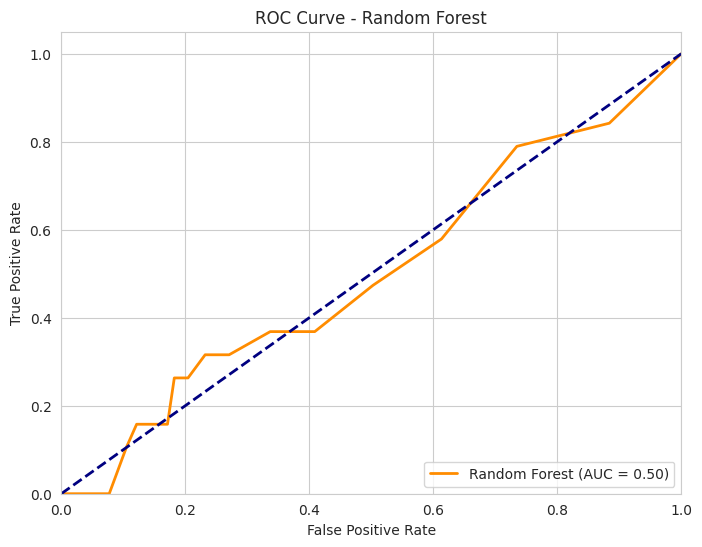

In [279]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, rf_probs, "Random Forest")

In [280]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# Plot ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Set plot details
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


ValueError: ignored